# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [93]:
import math
import sys

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [109]:
# YOUR CODE HERE

wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep = "\t")
wine = wine.dropna()
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
572,10.2,0.240,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.40,5
1395,8.6,0.685,0.10,1.6,0.092,3.0,12.0,0.99745,3.31,0.65,9.55,6
985,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.30,6
110,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.50,5
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.60,5
246,7.1,0.680,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.50,5
1236,7.8,0.550,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.40,6
1411,6.4,0.470,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.60,6
111,8.4,0.620,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.80,5
547,10.6,0.310,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.70,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [108]:
# YOUR CODE HERE
columns = wine.columns
columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

fixed_acidity - non-volatile acids like tartaric, malic, and citric acids, which do not evaporate during winemaking and contribute to the wine's taste

volatile_acidity - (VA) wine’s gaseous acids. The amount of VA in wine is often considered an indicator of spoilage.

citric_acid - acid used in winemaking to increase acidity, especially in low-acid wines, and to add a fresh, fruity citrus notes.

residual_sugar - natural grape sugar left after fermentation; dry wine = minimal sugar, higher sugar = sweeter wine.

chlorides - salt content 

free_sulfur_dioxide -  the available portion that acts as a preservative, protecting against oxidation and microbial spoilage.

total sulfur dioxide - prevents microbial growth.

density - wine density, related to sugar and alcohol content.

pH - 0 to 14 that measures how acidic or basic, lower pH = more acidic.

sulphates - additives that help control microbes

alcohol - percent of alcohol by volume

target - wine quality score (0–10) assigned by human tasters

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [97]:
# YOUR CODE HERE


# Step 1: Understanding information of data
# wine.head gives us the first 10 rows of the data, to help better understand the information working with
# len(wine) returns the number of rows in the dataset, which is 1599 in this case.
# wine.describe() #gives useful information, such as mean and standard deviation as well as amount of columns
# wine.shape tells the size of the data we are working with
# wine.dtypes #checking if there are categorical data (boolean, strings, etc), or other data types, all columns are float64 besides target which is int64 (all numerical data)
# wine.isnull().sum() checking for missing values before dropping null values
# there were no null values for any of the data, so no cleaning was required for missing data.
# (check for duplicate values)

# Step 2: Univarite Analysis 
# ax = wine['target'].plot.hist(bins=12, alpha=0.5, color = "red")
# plt.title("Wine Quality Distribution")
# plt.xlabel("Quality Score")
# plt.ylabel('Frequency')

# This histogram shows the distribution of the wine quality scores.
# We can see it is slightly right-skewed
# Scores 3–4 represent lower-quality wines, and scores 7–8 represent higher-quality wines,but both ends appear far less frequently than the center.

# Step 3: Bivarite Analysis 


YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

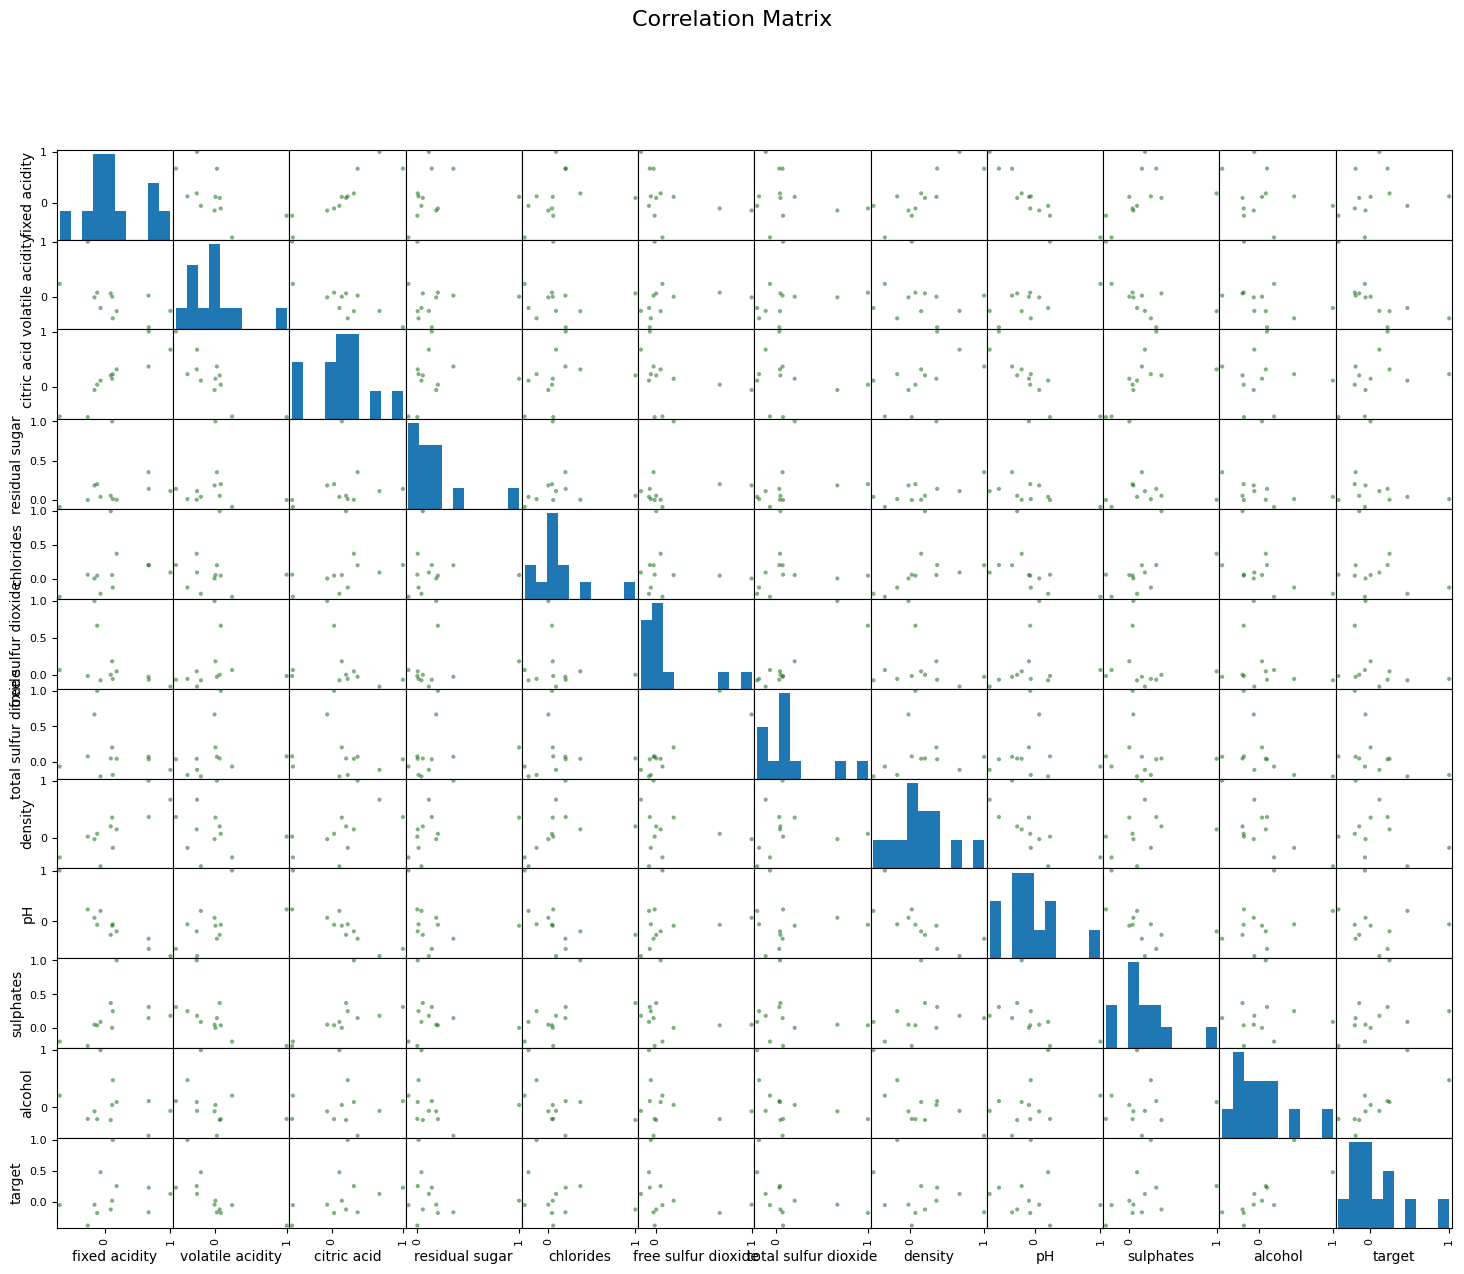

In [105]:
# YOUR CODE HERE
matrix = wine.corr()
matrix
pd.plotting.scatter_matrix(matrix, figsize=(18,14), color = "darkgreen")
plt.suptitle('Correlation Matrix', fontsize=16)
plt.tight_layout

YOUR ANSWERS HERE

Citric acid and fixed acidtiy .672 highest positive correlation.
Wines with high fixed acidity tend to have high citric acid levels

pH and fixed acidity of -.683 highest negative correlation. 
The reason is that the more fixed acidity the lower the pH will be. Lower pH is more acidic. 

Target and alchol of 0.476
The most correlated with the Target is alchol. Wines with higher alchool are rated higher. 

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [99]:
# YOUR CODE HERE
# LinearSVR- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
# The Linear Support Vector Regression is supervised machine learning model used for regression and outliers detection
# https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

# ridge_regression- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html
# L2 Regression is used for overfitting on trainingdata
# https://www.ibm.com/think/topics/ridge-regression

# Random Forest - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://www.ibm.com/think/topics/random-forest

YOUR ANSWERS HERE

LinearSVR- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

The Linear Support Vector Regression is supervised machine learning model used for regression and outliers detection.

https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

Ridge Regression- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html
L2 Regression is used for overfitting on training data.

https://www.ibm.com/think/topics/ridge-regression

Random Forest - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://www.ibm.com/think/topics/random-forest

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

L2 Loss for Each Model
Linear Support Vector Regression MSE 0.4338439833394795
Ridge Regression MSE 0.41746575596828844
Random Forest MSE 0.31746737081705523


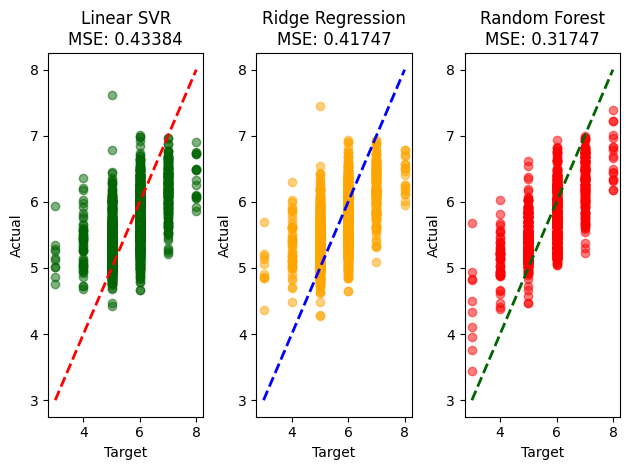

In [100]:
# YOUR CODE HERE
# Mean Squared Error and L2 Loss
def mean_squared_error(target, actual):
    error = target - actual
    error_squared = error * error
    return np.mean(error_squared)

# Target and Features
wine_features = wine.drop(columns=["target"]) # Input Features 
wine_target = wine["target"]          # Target Value

print('L2 Loss for Each Model')

#Model 1: Linear Support Vector Regression with L2 Regularization
linear_svr_l2 = sklearn.svm.LinearSVR(loss='squared_epsilon_insensitive', max_iter=2000)
linear_svr_l2.fit(wine_features, wine_target)
pred_svr = linear_svr_l2.predict(wine_features)

l2_loss_svr_penalty = 0.5 * (linear_svr_l2.coef_**2).sum()
mse_svr = mean_squared_error(wine_target,pred_svr)
l2_loss_svr = mse_svr + l2_loss_svr_penalty

# Model 2: Ridge Regression with L2 Regularization
ridge_regression_wine = sklearn.linear_model.Ridge(alpha=1.0)
ridge_regression_wine.fit(wine_features, wine_target)
pred_ridge = ridge_regression_wine.predict(wine_features)

l2_loss_ridge_penalty = 0.5 * (ridge_regression_wine.coef_**2).sum()
mse_ridge = mean_squared_error(wine_target,pred_ridge)
l2_loss_ridge = mse_ridge + l2_loss_ridge_penalty

# Model 3: Random Forest
forest_model =sklearn.ensemble.RandomForestRegressor(n_estimators=5, max_depth=5, random_state=15)
forest_model.fit(wine_features, wine_target)
pred_forest = forest_model.predict(wine_features)

mse_forest = mean_squared_error(wine_target,pred_forest)

# print("Linear Support Vector Regression L2 Total Loss:", l2_loss_svr)
# print("Ridge Total L2 Loss:", l2_loss_ridge)


print("Linear Support Vector Regression MSE", mse_svr)
print("Ridge Regression MSE", mse_ridge)
print("Random Forest MSE", mse_forest)

# Charts
y_range = [wine_target.min(), wine_target.max()]

plt.subplot(1, 3, 1)
plt.scatter(wine_target , pred_svr, alpha=0.5, color = "darkgreen")
plt.plot(y_range, y_range, color="red", linestyle="--", linewidth=2)
plt.xlabel("Target")
plt.ylabel("Actual")
plt.title(f'Linear SVR\nMSE: {mse_svr:.5f}')

plt.subplot(1, 3, 2)
plt.scatter(wine_target , pred_ridge, alpha=0.5, color = "orange")
plt.plot(y_range, y_range, color="blue", linestyle="--", linewidth=2)
plt.xlabel("Target")
plt.ylabel("Actual")
plt.title(f'Ridge Regression\nMSE: {mse_ridge:.5f}')

plt.subplot(1, 3, 3)
plt.scatter(wine_target , pred_forest, alpha=0.5, color = "red")
plt.plot(y_range, y_range, color="darkgreen", linestyle="--", linewidth=2)
plt.xlabel("Target")
plt.ylabel("Actual")
plt.title(f'Random Forest\nMSE: {mse_forest:.5f}')
plt.tight_layout()


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [101]:
# YOUR CODE HERE
from sklearn.model_selection import KFold, cross_validate, train_test_split

# Target and Features
wine_features = wine.drop(columns=["target"]) # Input Features 
wine_target = wine["target"]          # Target Value

# 5- fold Cross Validation 
kf = KFold(n_splits=5, shuffle=True, random_state=15)
train_features, test_features, train_target, test_target = train_test_split(wine_features, wine_target, test_size=.3, random_state=2000)

#Model 1: Linear Support Vector Regression with L2 Regularization
linear_svr_l2 = sklearn.svm.LinearSVR(loss='squared_epsilon_insensitive', max_iter=2000, random_state=15)
linear_svr_cv =  cross_validate(linear_svr_l2, train_features, train_target, cv = kf, scoring='neg_mean_squared_error')
print(f'Linear SVR CV MSE, {linear_svr_cv['test_score'].mean()*-1:.5f}')

# Model 2: Ridge Regression with L2 Regularization
ridge_regression_wine = sklearn.linear_model.Ridge(alpha=1.0, random_state=15)
ridge_regression_cv =  cross_validate(ridge_regression_wine, train_features, train_target, cv = kf, scoring='neg_mean_squared_error')
print(f'Ridge CV MSE, {ridge_regression_cv['test_score'].mean()*-1:.5f}')

# Model 3: Random Forest
forest_model =sklearn.ensemble.RandomForestRegressor(n_estimators=5, max_depth=5,random_state=15)
forest_model_cv =  cross_validate(forest_model, train_features, train_target, cv = kf, scoring='neg_mean_squared_error')
print(f'Forest CV MSE, {forest_model_cv['test_score'].mean()*-1:.5f}')

# L2 of Trained Against Whole Data Set
mse_svr = mean_squared_error(wine_target,pred_svr)
mse_ridge = mean_squared_error(wine_target,pred_ridge)
mse_forest = mean_squared_error(wine_target,pred_forest)

# print(mse_svr/(linear_svr_cv['test_score'].mean()*-1))
# print(mse_ridge/(ridge_regression_cv['test_score'].mean()*-1))
# print(mse_forest/(forest_model_cv['test_score'].mean()*-1))

Linear SVR CV MSE, 0.43641
Ridge CV MSE, 0.42817
Forest CV MSE, 0.42049


YOUR ANSWERS HERE

Linear SVR and Ridge remain about the same less than a 3% change. 
Random forest saw an almost 33% change increase.
This means a small overfitting for Linear SVR and Ridge Regression and random forest has significant overfit. 


### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [102]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

# Target and Features
wine_features = wine.drop(columns=["target"]) # Input Features 
wine_target = wine["target"]          # Target Value

#Model 1: Linear Support Vector Regression with L2 Regularization
svr_pipeline = make_pipeline(StandardScaler(), PCA(), sklearn.svm.LinearSVR())
svr_pipe = svr_pipeline.fit(wine_features, wine_target)
pred_svr_pipe = svr_pipe.predict(wine_features)

mse_svr_pipe = mean_squared_error(wine_target,pred_svr_pipe)

# Model 2: Ridge Regression with L2 Regularization
ridge_pipeline = make_pipeline(StandardScaler(), PCA(), sklearn.linear_model.Ridge())
ridge_pipe = ridge_pipeline.fit(wine_features, wine_target)
pred_ridge_pipe = ridge_pipe.predict(wine_features)

mse_ridge_pipe = mean_squared_error(wine_target,pred_ridge_pipe)

# Model 3: Random Forest
forest_pipeline = make_pipeline(StandardScaler(), PCA(), sklearn.ensemble.RandomForestRegressor(random_state=15))
forest_pipe = forest_pipeline.fit(wine_features, wine_target)
pred_forest_pipe = forest_pipe.predict(wine_features)

mse_forest_pipe = mean_squared_error(wine_target,pred_forest_pipe)


print(f'Linear SVR Scaler MSE, {mse_svr_pipe:.5f}')
print(f'Ridge Scaler MSE, {mse_ridge_pipe:.5f}')
print(f'Random Forest Scaler MSE, {mse_forest_pipe:.5f}')

/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVR Scaler MSE, 0.42639
Ridge Scaler MSE, 0.41677
Random Forest Scaler MSE, 0.04562


YOUR ANSWERS HERE

LinearSVR had a small improvement of .2% from .434 to .426
Ridge Regression had no improvement or change roughly both a .417 
Random Forest saw drastic changes from .317 to .046 this is a 86% improvement 


### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [103]:
# YOUR CODE HERE

response = "Jane I understand your idea, but no we shouldnt because this will lead to overfitting on the cross validiation data." 
response

'Jane I understand your idea, but no we shouldnt because this will lead to overfitting on the cross validiation data.'

YOUR ANSWERS HERE

"Jane I understand your idea, but no we shouldnt because this will lead to overfitting on the cross validiation data." 

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [104]:
# YOUR CODE HERE


YOUR ANSWERS HERE

The best model was the forest regression model. Its L2 Loss or MSE (mean squared error) was the lowest when using the original data set and against the holdout data set , .331 and .420 respectively. Compared to Linear SVR that had a MSE of .434 on original data set and a .436 on holdout data set. The Ridge Regression had a .417 on original data set and a MSE of .428 on holdout data. Another reason why the forest regression model is best, is because the features have a non-linear relationship. The wine quality dataset has complex interactions between chemical properties (such as alcohol and acidity) that tree-based models are better at modeling.
